# Filter

Digitale Filter sind wichtige Werkzeuge für die Signalverarbeitung bzw. Zeitserienanalyse. Mit Filtern lässt sich Rauschen unterdrücken und das zu untersuchende Signal hervorheben. Desweiteren werden Filter für Interpolation und Vorhersagen verwendet. 

Man unterscheided zwischen Tiefpass-, Hochpass-, Bandpass- und Bandblockfiltern. 

 * **Tiefpassfilter** werden zur Rauschunterdrückung und Glättung eines Signals verwendet. Der Rechen-Prozess entspricht einer Summation bzw. Integration.
 * **Hochpassfilter** verstärken das Rauschen bzw. Änderungen im Signal. Hochpassfilter sind z.B. geeignet um Kanten zu detektieren (2D-Anwendung: Bildverarbeitung). Die Rechenoperation entspricht einer Differenz bzw. Ableitung.
 * **Bandpass bzw. Bandblockfilter** heben bestimmte Frequenzbänder hervor bzw. blockieren sie. Die Konstruktion erfolgt aus einer Kombination von Hoch- und Tiefpassfiltern.


## Literatur


 1. Digitale Signalverarbeitung : Filterung und Spektralanalyse mit MATLAB-Übungen  von Karl-Dirk Kammeyer, Kristian Kroschel http://dx.doi.org/10.1007/978-3-663-09805-8 
 2. https://de.wikipedia.org/wiki/Filter_mit_endlicher_Impulsantwort

## Definition und Eigenschaften der Delta-Funktion

Die Delta-Funktion hat die Eigenschaft

$$\int x(t)\delta(t-t_0)dt=x(t_0)$$

Die Delta-Funktion wird mittels Fourier-Transformation definiert 

$$x(t)=\int e^{\imath 2 \pi f t}df=\delta(t)$$ 

Die Fouriertransformierte der Delta-Funktion ist daher gleich eins 

$$X(f)=\int \delta(t) e^{-\imath 2 \pi f t}dt=1$$

Die Integralgrenzen seien von $-\infty$ bis $\infty$.

# Filter mit endlicher Impulsantwort 

Ein Finite Impule Responsing (FIR) Filter ist ein diskretes, nichtrekursives Filter. 

$$ x(t) \to \fbox{H(f)} \to y(t)$$

Im Ortsraum wird ein Filter durch eine Faltungsmaske $h(\tau)$ beschrieben, welche die Zeitserie $x(t)$ in einer Zeitserie $y(t)$ überführt

$$y(t)=\int h(\tau)x(t-\tau)d\tau$$

Für diskrete Werte ergibt sich

$$y_t=\sum_i h_i x_{t-i}$$

Ein gleitender Mittelwert mit Fensterlänge $l=3$ wird realisiert über die Faltungsmaske

$$ h=[h_{-1},h_{0},h_{1}]=\frac{1}{3}[1,1,1]$$

Der Filter $h(\tau)$ wird auch *Impulsantwort* genannt, weil $h$ die "Antwort" auf das Impuls-Signal $x(t)=\delta(t-\tau)$ ist. 


Im Frequenzraum gilt

$$Y(f)=X(f)\cdot H(f)$$

mit der Übertragungsfunktion

$$H(f)=\int e^{-\imath 2 \pi \tau} h(\tau)d\tau$$

Die Übertragungsfunktion wird auch Transferfunktion genannt.

Kennt man $x(t)$ und $y(t)$ kann die Übertragunsfunktion aus dem Spektrum bestimmt werden

$$H(f)=\frac{Y(f)}{X(f)}$$

## Beispiel Übertragungsfunktion

Wir untersuchen Filter anhand der Übertragung des Signals "Weisses Rauschen". Das Leistungsspektrum des Eingangssignals ist konstant. Die Impulsantwort lässt sich daher direkt im Spektrum erkennen. 

Wir nutzen im Folgenden ein Ensemble-Mittel zum Schätzen des Spektrums. Die Einzelspektren sind sehr verrauscht, daher gibt der Mittelwert aus vielen Spektren eine glattere Kurve. Ensemble-Mittelwert und Standardabweichung können auch zur Abschätzung der Signifikanz von Merkmalen im Spektrum (z.B. Resonanz-Spitzen) genutzt werden.


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:22: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:23: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:24: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


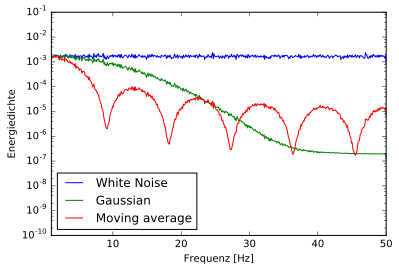

In [29]:
%pylab inline
%config InlineBackend.figure_format = 'svg'

import scipy.signal as sig

N=1024
M=100
X=rand(N*(M+1))


V=11
window = sig.gaussian(V,V/8)
window=window/sum(window)
X_filter1=convolve(X, window, mode='valid')
X_filter2=convolve(X, ones((V,))/V, mode='valid') # Einfacher laufender Mittelwert mittels Faltung

# Test: laufender Mittelwert programmiert als Schleife = identisches Ergebnis wie Faltung
#v=1 
#for i in range(1,N*M-1):
#    X_filter2[i]=1.0/(2*v+1)*(sum(X[i-v:i+v+1]))

Pxx_est=zeros(N/2+1)
Pxx_est_filter1=zeros(N/2+1)
Pxx_est_filter2=zeros(N/2+1)

for i in range(M):
    x=X[i*N:(i+1)*N]
    fs=100 # Sampling Frequenz in Hz
    f, Pxx = sig.periodogram(x, fs)
    Pxx_est+=Pxx
    
    x_filter1=X_filter1[i*N:(i+1)*N]
    f, Pxx = sig.periodogram(x_filter1, fs)
    Pxx_est_filter1+=Pxx
      
    x_filter2=X_filter2[i*N:(i+1)*N]
    f, Pxx = sig.periodogram(x_filter2, fs)
    Pxx_est_filter2+=Pxx
    

    
Pxx_est=Pxx_est/M
Pxx_est_filter1=Pxx_est_filter1/M
Pxx_est_filter2=Pxx_est_filter2/M


figure()
#semilogy(f, Pxx)
semilogy(f, Pxx_est,label='White Noise')
semilogy(f, Pxx_est_filter1,label='Gaussian')
semilogy(f, Pxx_est_filter2,label='Moving average')

legend(loc=3)
ylim([1e-10, 1e-1])
xlim([1, 50])

xlabel('Frequenz [Hz]')
ylabel('Energiedichte')


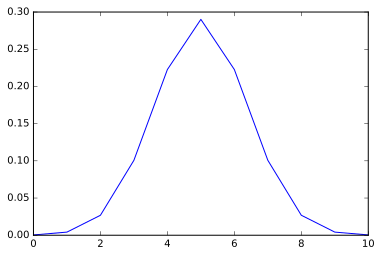

In [30]:
plot(window)

## Diskussion

Die Fouriertransformierte der Rechteckfunktion (genutzt für gleitenden Mittewert) 

$$\mathrm{rect}(t) = \Pi(t) = \begin{cases}
0 & \mbox{if } |t| > \frac{1}{2} \\
\frac{1}{2} & \mbox{if } |t| = \frac{1}{2} \\
1 & \mbox{if } |t| < \frac{1}{2} \\
\end{cases}$$


ist die sinc-Funktion

$$H(f)=sinc(f)=\frac{\sin \pi f}{\pi f}$$

https://de.wikipedia.org/wiki/Sinc-Funktion

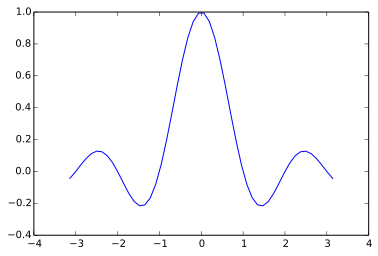

In [2]:
f=linspace(-pi,pi)
plot(f,sin(pi*f)/(pi*f))

Die Nebenmaxima der sinc-Funktion sind deutlich in der Übertragungsfunktion erkennbar. Die Fouriertransformierte der Gauß-Funktion hat wieder die Form einer Gaußfunktion. Daher hat das Gauß-Fenster besondere Glättungseigenschaften.